In [2]:
# IMPORT IT ALL

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
import xlrd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from scipy.linalg import svd

In [3]:
# Set the data equal to some variables so we can use them later
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')

# Remove observations / attributes with too many NaN or missing values
train = train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1)

In [4]:
# Get most common elemnts for each column and fill the missing values with that element
# df is used as stand-in name for train
def getMostCommonElements(df):
    biggestElement = 0
    
    # Get the most common element by using size(), which returns the element and how common it is
    for column in df:
        colSize = df.groupby([column]).size()
        
        # Check if the column is an object, float64 or int64
        isItFloat = (df[column].dtype == np.float64)
        isItInt = (df[column].dtype == np.int64)
        
        # If it is an object, find the most common element and fill missing and NaN values
        if(not isItFloat and not isItInt):
            for i in colSize:
                if i > biggestElement:
                    biggestElement = i
                    
        # If it is either a float64 or int64, then calculate the mean and fill missing and NaN values            
        else:
            if isItFloat:
                biggestElement = np.nanmean(df[column], dtype=np.float64)
            if isItInt:
                biggestElement = np.nanmean(df[column], dtype=np.int64)
        
        # Fill the values in our dataset
        train[column] = train[column].fillna(biggestElement)
        biggestElement = 0

getMostCommonElements(train)

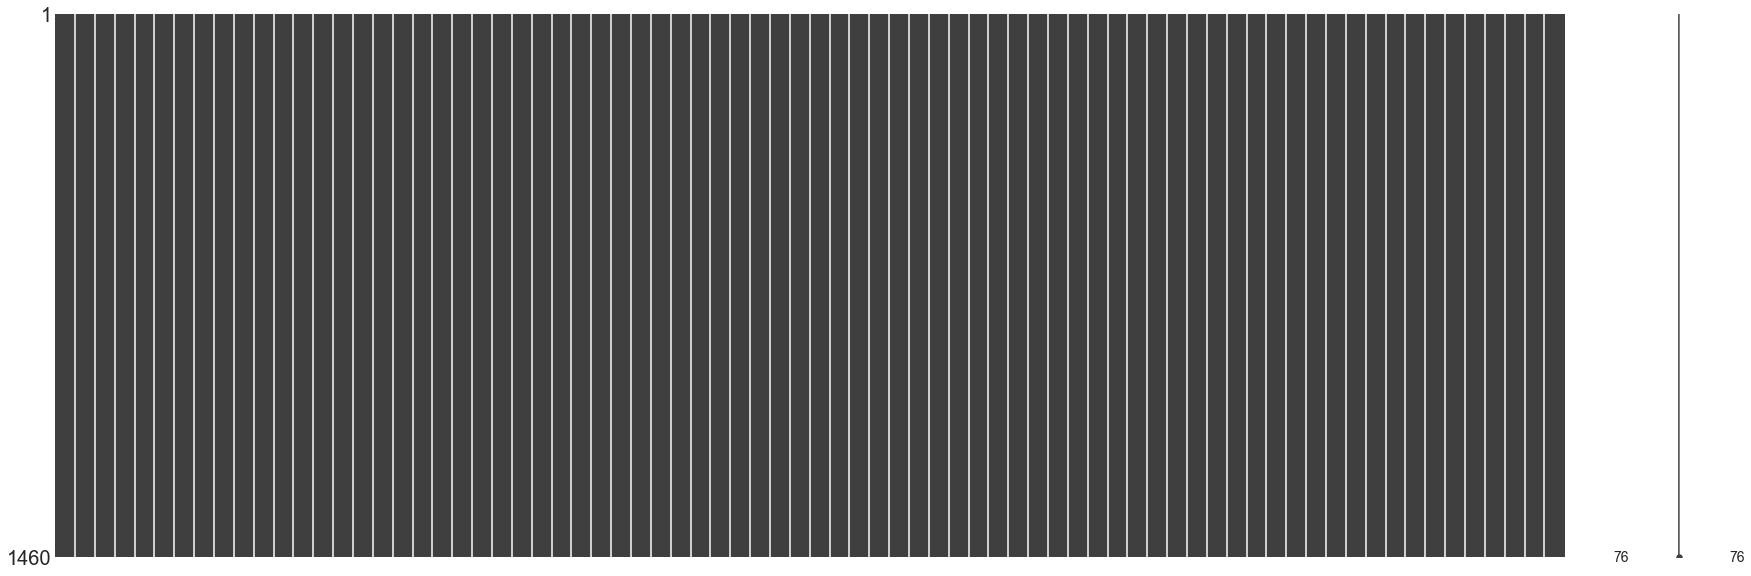

In [18]:
missingno.matrix(train, figsize = (30,10))

In [20]:
# get_dummies is one-hot encoding the data
train = pd.get_dummies(train, prefix_sep='_', drop_first=True)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


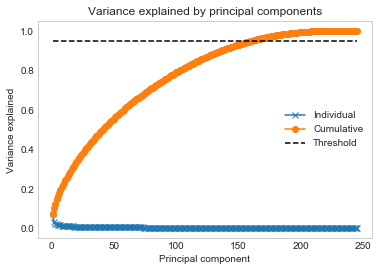

In [25]:
# Get values from df

raw_data = train.get_values()
cols = range(0,245)

# Get all columns
X = raw_data[:,cols]

# normalize : subtract mean and divide by std
N = len(X)
Y = X - np.ones((N,1))*X.mean(axis=0)

Y = Y*(1/np.std(Y,0))

# compute the singular value decomposition with svd
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum()

threshold = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()
